In [355]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['font.family'] = 'D2coding'
plt.rcParams['font.size'] = 9
plt.rcParams['axes.unicode_minus'] = False

In [356]:
KMRD_DATASET_PATH = '../../../kmrd-small/'

        user  rate
465      465   413
44        44   375
1051    1051   322
170      170   278
110      110   262
...      ...   ...
9694    9694     1
52016  52016     1
52001  52001     1
52002  52002     1
52003  52003     1

[52028 rows x 2 columns]
총 평가 수: 1259813건
총 유저 수: 52028명
평균 평가 수: 2.705건
최대 평가자: 413건


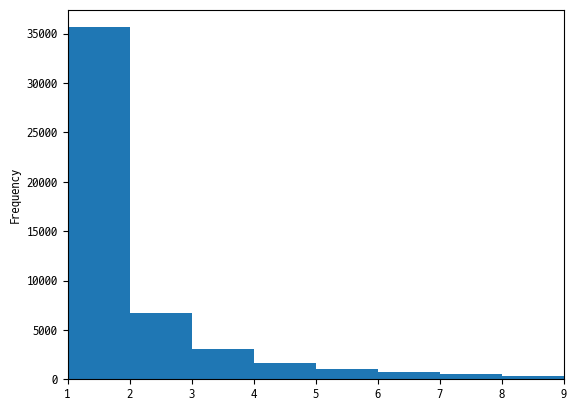

In [357]:
df_rates = pd.read_csv(KMRD_DATASET_PATH + 'rates.csv').dropna()

tmp = df_rates.groupby('user').agg({'rate': 'count'}).reset_index().sort_values(by='rate', ascending=False)

print(tmp)

print(f'총 평가 수: {df_rates["rate"].sum()}건')
print(f'총 유저 수: {df_rates["user"].nunique()}명')
print(f'평균 평가 수: {tmp["rate"].mean():.3f}건')
print(f'최대 평가자: {tmp["rate"].max()}건')

tmp['rate'].plot(kind='hist', bins=range(0, 500))
plt.xlim(1, 9)
plt.show()


rate_category
10-    49887
10+     2141
Name: count, dtype: int64


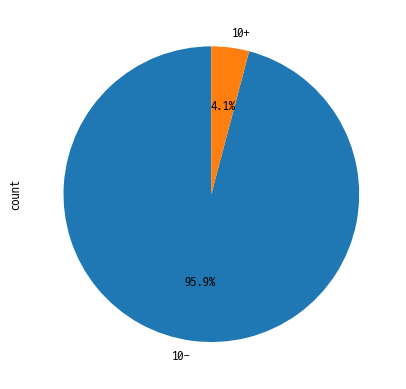

In [358]:
tmp['rate_category'] = tmp['rate'].apply(lambda x: '10-' if x < 10 else '10+')

rate_counts = tmp['rate_category'].value_counts()

print(rate_counts)

rate_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=rate_counts.index)
plt.show()

rate_category
5-    46964
5+     5064
Name: count, dtype: int64


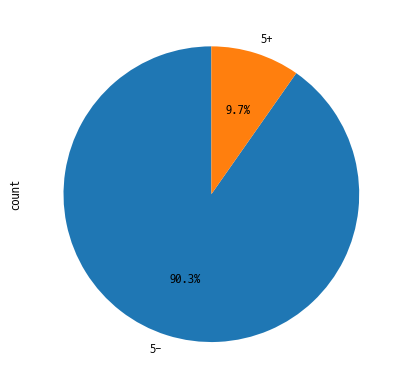

In [359]:
tmp['rate_category'] = tmp['rate'].apply(lambda x: '5-' if x < 5 else '5+')

rate_counts = tmp['rate_category'].value_counts()

print(rate_counts)

rate_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=rate_counts.index)
plt.show()

In [360]:
def show_user_line_plot(user_id):
    most_rated_users = df_rates[df_rates['user'] == user_id].sort_values(by='time')
    most_rated_users['time'] = pd.to_datetime(most_rated_users['time'], unit='s')
    most_rated_users['weekday'] = most_rated_users['time'].dt.dayofweek
    print(most_rated_users)
    
    weekday_trend = most_rated_users.groupby('weekday').size()
    print(weekday_trend)
    
    plt.figure(figsize=(20, 6))
    plt.plot(most_rated_users['time'], most_rated_users['rate'])
    plt.show()

       user  movie  rate                time  weekday
10294   465  10970    10 2004-01-23 16:25:00        4
10067   465  10117     9 2004-02-14 16:00:00        5
9929    465  10020     6 2004-02-18 12:42:00        2
9972    465  10047    10 2004-03-10 11:11:00        2
9974    465  10048    10 2004-05-10 15:42:00        0
...     ...    ...   ...                 ...      ...
9924    465  10016    10 2017-04-17 02:12:00        0
9970    465  10046     7 2018-02-16 17:55:00        4
10169   465  10442    10 2018-03-17 08:35:00        5
10126   465  10262     9 2018-11-11 16:58:00        6
10214   465  10670    10 2019-08-28 11:18:00        2

[413 rows x 5 columns]
weekday
0     72
1     24
2     32
3     49
4    104
5     58
6     74
dtype: int64


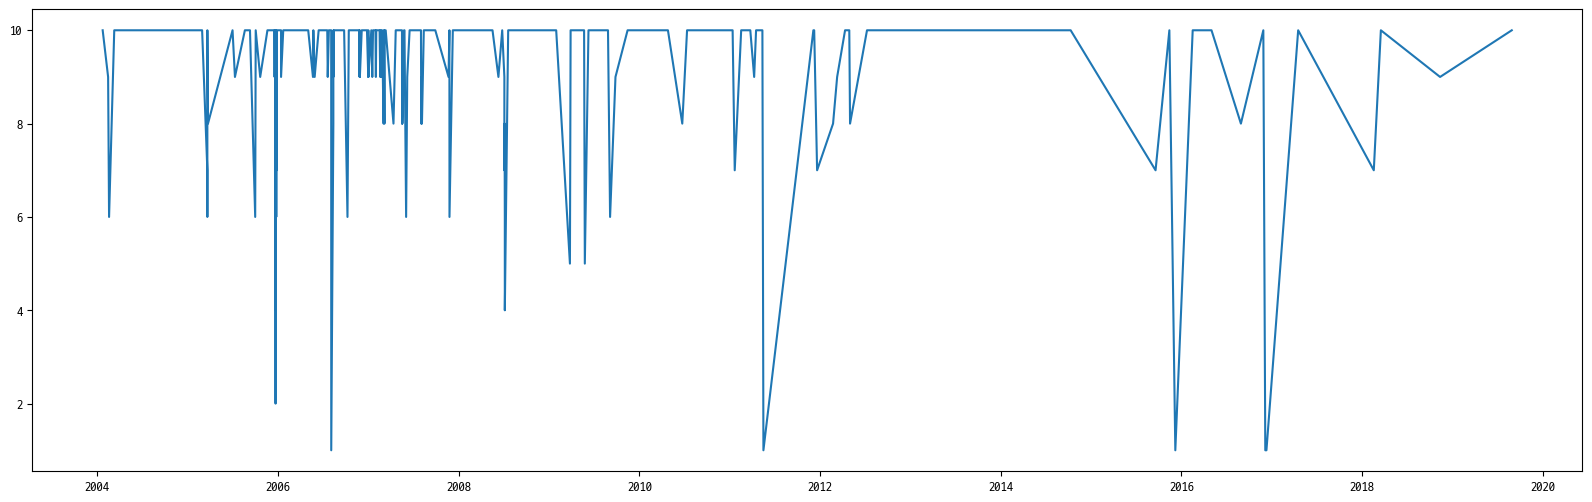

In [361]:
show_user_line_plot(465)

      user  movie  rate                time  weekday
1466    44  10185    10 2004-01-24 18:22:00        5
1456    44  10146    10 2004-02-26 09:03:00        3
1604    44  10936    10 2004-03-24 12:53:00        2
1580    44  10744    10 2004-04-25 11:19:00        6
1581    44  10744    10 2004-04-25 11:21:00        6
...    ...    ...   ...                 ...      ...
1288    44  10002    10 2019-12-03 11:03:00        1
1548    44  10561    10 2019-12-06 16:33:00        4
1398    44  10072    10 2019-12-06 16:36:00        4
1392    44  10071    10 2019-12-06 16:39:00        4
1431    44  10107    10 2019-12-16 19:51:00        0

[375 rows x 5 columns]
weekday
0    51
1    50
2    47
3    47
4    59
5    56
6    65
dtype: int64


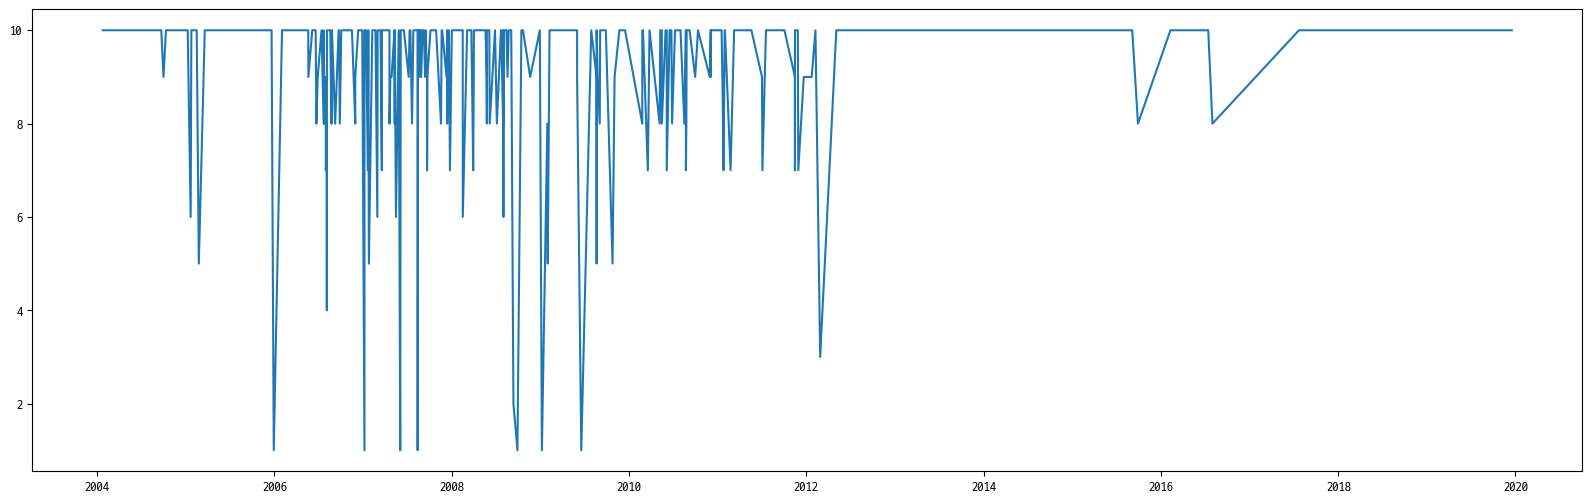

In [362]:
show_user_line_plot(44)

       user  movie  rate                time  weekday
17209  1051  10489     9 2013-03-23 07:06:00        5
17085  1051  10149     6 2013-05-01 01:59:00        2
17010  1051  10008    10 2013-05-13 07:52:00        0
17051  1051  10066     8 2013-05-13 07:55:00        0
17119  1051  10192     7 2013-05-19 06:16:00        6
...     ...    ...   ...                 ...      ...
17228  1051  10564     7 2019-09-25 23:32:00        2
17285  1051  10806     6 2019-09-27 00:33:00        4
17239  1051  10614     7 2019-11-15 00:23:00        4
17223  1051  10535     4 2019-11-20 00:39:00        2
17125  1051  10204     6 2019-12-01 02:34:00        6

[322 rows x 5 columns]
weekday
0    49
1    37
2    46
3    35
4    55
5    55
6    45
dtype: int64


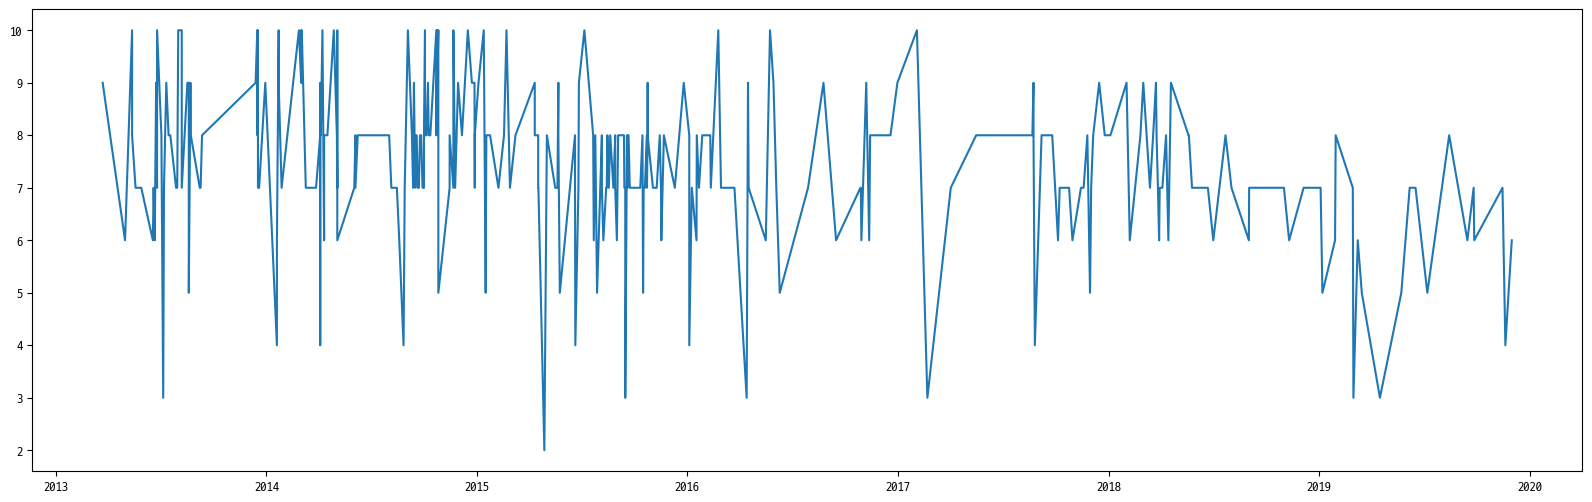

In [363]:
show_user_line_plot(1051)

In [364]:
def show_hitmap(n):
	df_genres = pd.read_csv(KMRD_DATASET_PATH + 'genres.csv')
	df_rates = pd.read_csv(KMRD_DATASET_PATH + 'rates.csv')
	df_rates_grouped = pd.merge(df_rates, df_genres, on='movie').groupby(['user', 'genre']).size().reset_index(name='count')
	pivot_df = df_rates_grouped.pivot_table(index='user', columns='genre', values='count', fill_value=0)

	log_transformed_df = np.log1p(pivot_df)
	log_transformed_df = log_transformed_df.head(n)

	plt.figure(figsize=(10, 8))
	sns.heatmap(log_transformed_df)
	plt.show()

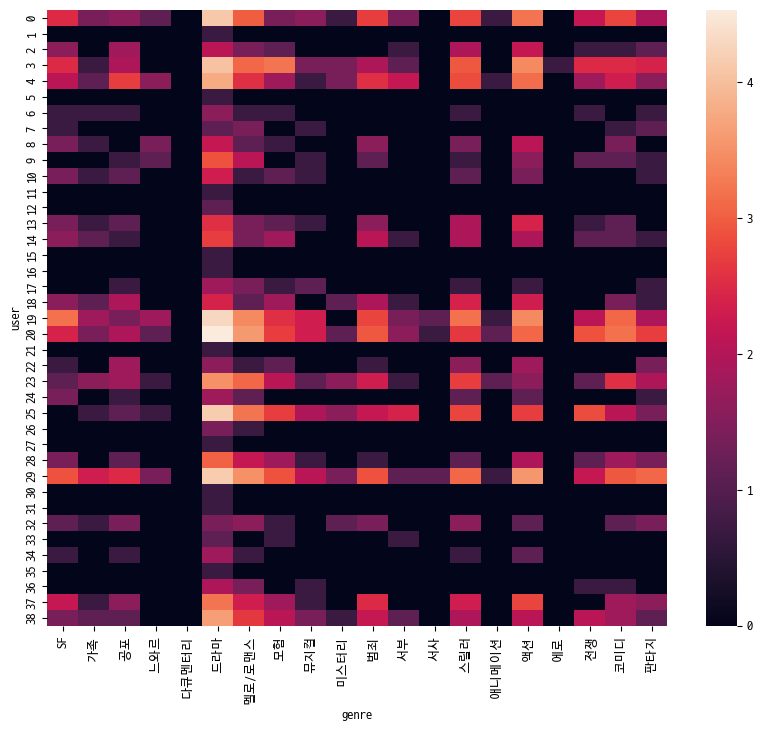

In [366]:

hi = int(input('Press Enter to continue...'))
show_hitmap(hi)
